### creating word vectors using word2vec

In [1]:
#Load dependancies

import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trinakarmakar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/trinakarmakar/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
len(gutenberg.fileids())

18

#### tokenize our text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [9]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [11]:
gberg_sents = gutenberg.sents()

In [12]:
gberg_sents[:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [13]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [14]:
gberg_sents[4][14]

'father'

In [15]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [16]:
len(gutenberg.words())

2621613

### Run word2vec

In [17]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, 
                 window=10, min_count=2, seed=42)

In [18]:
model.save('raw_gutenberg_model.w2v')

In [19]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [20]:
model['dog']

array([-0.07624974,  0.26254445,  0.23854733, -0.36334538, -0.3402119 ,
        0.47255856, -0.06981663,  0.11512198,  0.41351137,  0.3596997 ,
        0.53333277, -0.49898064,  0.1362972 ,  0.11265375,  0.09734205,
       -0.24759582, -0.29887372,  0.0816509 , -0.37802455,  0.36897442,
       -0.06655727,  0.66320068,  0.08995613, -0.22952382,  0.25824261,
       -0.14630342, -0.21862699,  0.13142653,  0.30007756, -0.55535787,
       -0.3301751 ,  0.70458156,  0.10176831, -0.43890983,  0.30376086,
       -0.17781588, -0.19899379,  0.398222  , -0.06603307, -0.70142055,
       -0.26642096, -0.01841878,  0.35272175, -0.51496011, -0.12929867,
       -0.22578272, -0.24740498,  0.10814149, -0.47277793,  0.0281035 ,
        0.17024164, -0.3042174 , -0.07993954, -0.2977584 , -0.16579416,
       -0.04818589, -0.44987977,  0.14864676, -0.28776935, -0.25505906,
       -0.32330266,  0.17531814,  0.12224919,  0.06443273], dtype=float32)

In [21]:
len(model['dog'])

64

In [22]:
model.most_similar('dog')

[('puppy', 0.8492962121963501),
 ('sweeper', 0.796351432800293),
 ('thief', 0.785873293876648),
 ('chimney', 0.7797834873199463),
 ('cage', 0.7646600604057312),
 ('pet', 0.763862133026123),
 ('lazy', 0.7607086300849915),
 ('bun', 0.755465030670166),
 ('butcher', 0.7531524896621704),
 ('mouse', 0.747418224811554)]

In [23]:
model.most_similar('think')

[('suppose', 0.8642827272415161),
 ('know', 0.8421430587768555),
 ('really', 0.8278493285179138),
 ('talk', 0.8245725631713867),
 ('guess', 0.8243345022201538),
 ('manage', 0.8214577436447144),
 ('mean', 0.8194065093994141),
 ('shouldn', 0.8169735670089722),
 ('contradict', 0.8147258758544922),
 ('impertinent', 0.8142688870429993)]

In [24]:
model.most_similar('day')

[('time', 0.7879937887191772),
 ('morning', 0.7703922986984253),
 ('month', 0.7276961803436279),
 ('night', 0.7257522344589233),
 ('sabbath', 0.7046078443527222),
 ('Adar', 0.6903926134109497),
 ('year', 0.6882885098457336),
 ('fourteenth', 0.6755183339118958),
 ('week', 0.6737951040267944),
 ('seventh', 0.6734830737113953)]

In [25]:
model.most_similar('father')

[('mother', 0.8793624043464661),
 ('brother', 0.8275318145751953),
 ('daughter', 0.8027428984642029),
 ('sister', 0.7982655763626099),
 ('wife', 0.7903817892074585),
 ('Tamar', 0.7610060572624207),
 ('Amnon', 0.7563380002975464),
 ('master', 0.7521241307258606),
 ('servant', 0.7475473284721375),
 ('uncle', 0.7460008859634399)]

In [26]:
model.doesnt_match('mother father daughter dog'.split())

'dog'

In [27]:
model.similarity('father', 'dog')

0.45797140930736535

In [29]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.8290106654167175),
 ('daughter', 0.811842679977417),
 ('sister', 0.8006704449653625),
 ('wife', 0.7808036804199219),
 ('husband', 0.7705142498016357),
 ('brother', 0.7161262035369873),
 ('Sarai', 0.7043083906173706),
 ('daughters', 0.6991891860961914),
 ('Sarah', 0.6931062340736389),
 ('youngest', 0.6792627573013306)]

In [32]:
model.most_similar(positive=['son', 'woman'], negative=['man'])

[('wife', 0.7350568771362305),
 ('daughter', 0.7336771488189697),
 ('Sarai', 0.7193369269371033),
 ('Caleb', 0.7054648995399475),
 ('Hittite', 0.7009668946266174),
 ('Jesse', 0.6998919248580933),
 ('Sarah', 0.6988949179649353),
 ('Bilhah', 0.6957084536552429),
 ('brother', 0.6939918398857117),
 ('Leah', 0.690830409526825)]

In [31]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

[('wife', 0.7591227293014526),
 ('sister', 0.7436699867248535),
 ('mother', 0.7322337627410889),
 ('daughter', 0.7092304229736328),
 ('child', 0.690180242061615),
 ('conceived', 0.6669987440109253),
 ('maid', 0.6514891386032104),
 ('daughters', 0.6472429037094116),
 ('womb', 0.6338502168655396),
 ('bare', 0.6256169080734253)]

In [36]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('David', 0.7191699743270874),
 ('Pharaoh', 0.6987558603286743),
 ('queen', 0.6982114911079407),
 ('Solomon', 0.6946915984153748),
 ('Abram', 0.6937858462333679)]

### Reduce word vectors dimensionality

In [37]:
len(model.wv.vocab)

30461

In [38]:
X = model[model.wv.vocab]

In [41]:
tsne = TSNE(n_components=2, n_iter=1000)

In [42]:
x_2d = tsne.fit_transform(X)

In [43]:
coords_df = pd.DataFrame(x_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [44]:
coords_df.head()

,x,y,token
0,16.074978,20.266672,changeless
1,3.318840,8.207176,jeopardized
2,26.556919,3.244079,Shakers
3,23.315020,-15.285479,Sprights
4,4.197472,-37.956402,Comrade


In [45]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

In [46]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [48]:
coords_df.head(20)

,x,y,token
0,16.074978,20.266672,changeless
1,3.318840,8.207176,jeopardized
2,26.556919,3.244079,Shakers
3,23.315020,-15.285479,Sprights
4,4.197472,-37.956402,Comrade
5,34.006554,4.833879,retracing
6,-2.907088,-12.954993,apprehensiveness
7,6.248580,1.574632,atmospheres
8,-34.786167,-17.273764,sinned
9,-24.431824,5.402620,consuming


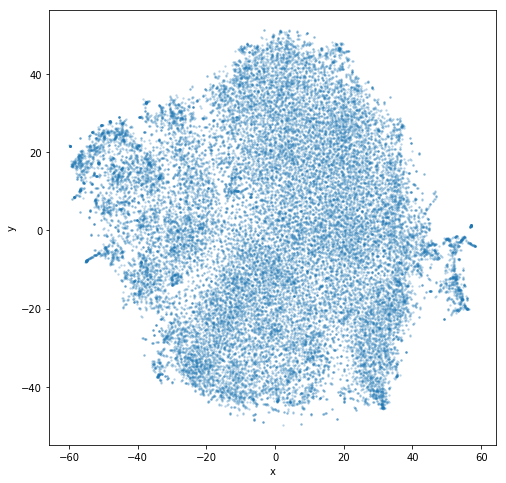

In [50]:
_ = coords_df.plot.scatter('x', 'y', figsize=[8,8], 
                           marker='.', s = 10, alpha=0.2)

In [56]:
output_notebook()

Loading BokehJS ...

In [57]:
subset_df = coords_df.sample(n=5000)

In [58]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y = subset_df.y, text = subset_df.token)

In [59]:
show(p)